In [ ]:
import pandas as pd
import numpy as np

emb_df = pd.read_csv("train_embeddings.csv")

# 2. Формирование X
feature_cols = [col for col in emb_df.columns if col.startswith('emb_')] + ['is_padded']
X = emb_df[feature_cols].astype(np.float32).values
id_df = emb_df[['filename', 'slice_idx']].copy()

print(f"X ready: {X.shape}")


/var/folders/s6/qc5d8jnx5t3cb8p0j947kkww0000gn/T/ipykernel_25811/1073399028.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  emb_df = pd.read_csv("train_embeddings.csv")


✅ X готов: (190153, 2049)


In [ ]:
emb_df

,species_id,filename,slice_idx,is_padded,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,...,emb_2038,emb_2039,emb_2040,emb_2041,emb_2042,emb_2043,emb_2044,emb_2045,emb_2046,emb_2047
0,1139490,CSA36385.ogg,0,False,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.074304,0.0,0.453683,0.001007,0.269947,0.0,0.0,0.000000
1,1139490,CSA36385.ogg,1,False,0.0,0.0,0.0,0.0,0.045933,0.0,...,0.0,0.0,0.412620,0.0,0.601018,0.063359,0.537751,0.0,0.0,0.000000
2,1139490,CSA36385.ogg,2,False,0.0,0.0,0.0,0.0,0.075897,0.0,...,0.0,0.0,0.267724,0.0,0.685824,0.016598,0.298818,0.0,0.0,0.000000
3,1139490,CSA36385.ogg,3,False,0.0,0.0,0.0,0.0,0.065628,0.0,...,0.0,0.0,0.351601,0.0,0.707571,0.035997,0.487343,0.0,0.0,0.000000
4,1139490,CSA36385.ogg,4,False,0.0,0.0,0.0,0.0,0.071467,0.0,...,0.0,0.0,0.250007,0.0,0.593107,0.026449,0.504154,0.0,0.0,0.004630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190148,ywcpar,XC960831.ogg,0,False,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.215447,0.0,0.678990,0.011700,0.343260,0.0,0.0,0.004088
190149,ywcpar,XC960831.ogg,1,False,0.0,0.0,0.0,0.0,0.007831,0.0,...,0.0,0.0,0.238516,0.0,0.310642,0.000000,0.278641,0.0,0.0,0.000000
190150,ywcpar,XC960831.ogg,2,False,0.0,0.0,0.0,0.0,0.035802,0.0,...,0.0,0.0,0.573520,0.0,0.600016,0.116064,0.304029,0.0,0.0,0.000000
190151,ywcpar,XC960831.ogg,3,False,0.0,0.0,0.0,0.0,0.041321,0.0,...,0.0,0.0,0.292423,0.0,0.445533,0.088091,0.463783,0.0,0.0,0.061758


In [ ]:

meta_df = pd.read_csv("train.csv")

meta_df['filename'] = meta_df['filename'].apply(lambda x: x.split('/')[-1])
label_df = meta_df[['filename', 'primary_label']]
label_df = meta_df[['filename', 'primary_label']].drop_duplicates(subset='filename')

full_df = id_df.merge(label_df, on='filename', how='left')

full_df = id_df.merge(label_df, on='filename', how='left')

all_species = sorted(full_df['primary_label'].dropna().unique())
species_to_idx = {sp: i for i, sp in enumerate(all_species)}
n_classes = len(all_species)

Y = np.zeros((len(full_df), n_classes), dtype=np.uint8)
for i, sp in enumerate(full_df['primary_label']):
    if pd.notnull(sp) and sp in species_to_idx:
        Y[i, species_to_idx[sp]] = 1

print(f"Y ready: {Y.shape}, активных меток: {Y.sum()}")

✅ Y готов: (190153, 206), активных меток: 190153


In [4]:
meta_df

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license
0,1139490,[''],[''],CSA36385.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
1,1139490,[''],[''],CSA36389.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3206,-73.7128,Ragoniella pulchella,Ragoniella pulchella,Fabio A. Sarria-S,cc-by-nc-sa 4.0
2,1192948,[''],[''],CSA36358.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
3,1192948,[''],[''],CSA36366.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.28,-73.8582,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
4,1192948,[''],[''],CSA36373.ogg,CSA,0.0,http://colecciones.humboldt.org.co/rec/sonidos...,7.3791,-73.7313,Oxyprora surinamensis,Oxyprora surinamensis,Fabio A. Sarria-S,cc-by-nc-sa 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28559,ywcpar,[''],[''],iNat77392.ogg,iNat,0.0,https://static.inaturalist.org/sounds/77392.m4a,7.6921,-80.3379,Amazona ochrocephala,Yellow-crowned Parrot,Yennifer Alfaro,cc-by-nc 4.0
28560,ywcpar,[''],[''],iNat78624.ogg,iNat,0.0,https://static.inaturalist.org/sounds/78624.wav,8.9918,-79.4877,Amazona ochrocephala,Yellow-crowned Parrot,Evan Centanni,cc-by-nc-sa 4.0
28561,ywcpar,[''],[''],iNat789234.ogg,iNat,0.0,https://static.inaturalist.org/sounds/789234.wav,9.2316,-70.2041,Amazona ochrocephala,Yellow-crowned Parrot,Henrry,cc-by 4.0
28562,ywcpar,[''],[''],iNat819873.ogg,iNat,0.0,https://static.inaturalist.org/sounds/819873.mp3,10.5838,-66.8545,Amazona ochrocephala,Yellow-crowned Parrot,Alejandro Luy,cc-by-nc 4.0


In [5]:
Y[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from time import time

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# 7. Обучение модели
base_model = RandomForestClassifier(n_estimators=50, max_depth=6, class_weight='balanced', n_jobs=-1)
multi_model = MultiOutputClassifier(base_model)

start = time()
multi_model.fit(X_train, Y_train)

Y_pred = multi_model.predict(X_val)

micro_f1 = f1_score(Y_val, Y_pred, average='micro')
macro_f1 = f1_score(Y_val, Y_pred, average='macro')
print(f"Micro F1: {micro_f1:.4f}, Macro F1: {macro_f1:.4f}")

# 9. ROC-AUC
Y_val_probs = np.zeros_like(Y_val, dtype=np.float32)
for i, estimator in enumerate(multi_model.estimators_):
    Y_val_probs[:, i] = estimator.predict_proba(X_val)[:, 1]

roc_auc_micro = roc_auc_score(Y_val, Y_val_probs, average='micro')
roc_auc_macro = roc_auc_score(Y_val, Y_val_probs, average='macro')
print(f"📈 ROC-AUC Micro: {roc_auc_micro:.4f}, Macro: {roc_auc_macro:.4f}")

🚀 Обучение модели...
✅ Обучено за 1228.69 сек


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🎯 Micro F1: 0.1098, Macro F1: 0.1520


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


📈 ROC-AUC Micro: 0.9424, Macro: nan


In [7]:
from sklearn.metrics import roc_auc_score

# Получаем вероятности
Y_probs = np.array([est.predict_proba(X_val)[:, 1] for est in multi_model.estimators_]).T

# ROC-AUC per class
auc_per_class = []
for i in range(Y_val.shape[1]):
    try:
        auc = roc_auc_score(Y_val[:, i], Y_probs[:, i])
        auc_per_class.append(auc)
    except ValueError:
        # Иногда класс отсутствует полностью → пропускаем
        pass

# Среднее
roc_auc_macro = np.mean(auc_per_class)
roc_auc_micro = roc_auc_score(Y_val, Y_probs, average='micro')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [11]:
valid_classes = 0
auc_per_class = []

for i in range(Y_val.shape[1]):
    y_true = Y_val[:, i]
    y_prob = Y_probs[:, i]

    # Проверим, есть ли хотя бы одна 1 и одна 0
    if np.any(y_true == 1) and np.any(y_true == 0):
        auc = roc_auc_score(y_true, y_prob)
        auc_per_class.append(auc)
        valid_classes += 1
    else:
        print(f"⚠️ Класс {i}: пропущен (все значения = {np.unique(y_true)})")

print(f"✅ Расчитан ROC-AUC по {valid_classes} классам из {Y_val.shape[1]}")
roc_auc_macro = np.mean(auc_per_class)
print(f"📈 Macro ROC-AUC: {roc_auc_macro:.4f}")



⚠️ Класс 9: пропущен (все значения = [0])
⚠️ Класс 23: пропущен (все значения = [0])
⚠️ Класс 24: пропущен (все значения = [0])
⚠️ Класс 58: пропущен (все значения = [0])
✅ Расчитан ROC-AUC по 202 классам из 206
📈 Macro ROC-AUC: 0.9194


In [9]:
roc_auc_micro

0.9423691856454819

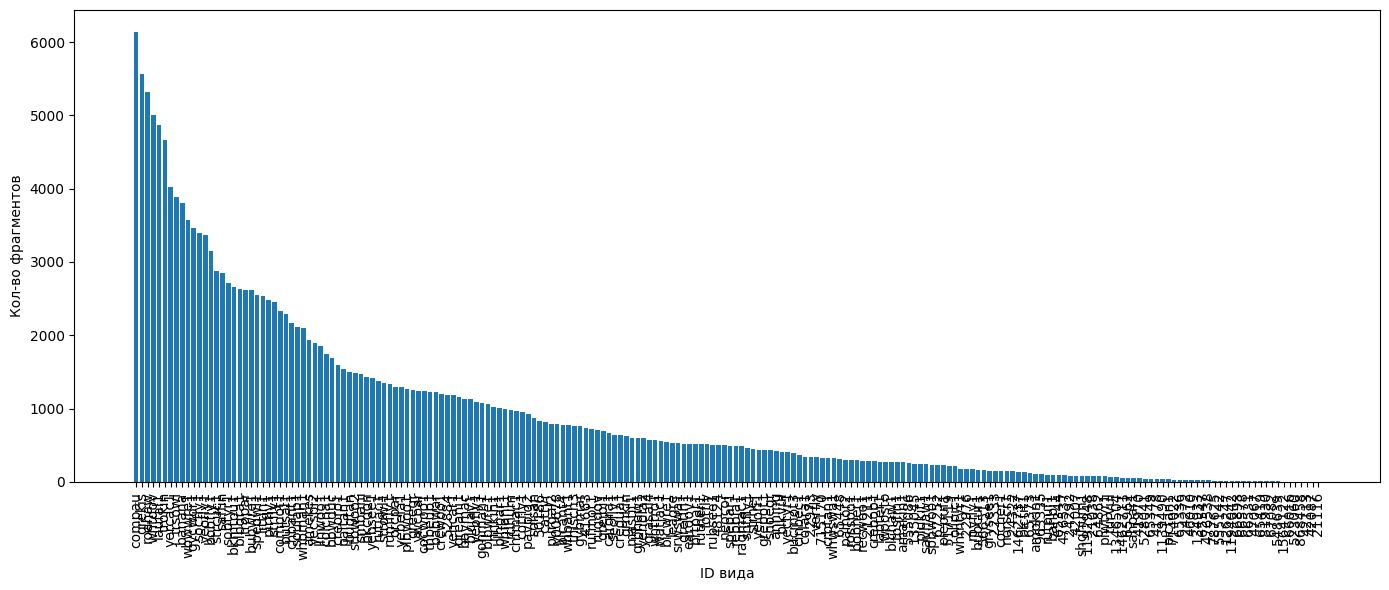

❗ Полностью нулевых классов: 0 из 206
🔍 Классов с < 10 примерами: 11
🔍 Классов с < 5 примерами: 6


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Пусть у нас есть: Y, all_species (список названий классов по индексам)

# 1. Сумма по классам
class_counts = Y.sum(axis=0)
class_df = pd.DataFrame({
    'species': all_species,
    'count': class_counts
}).sort_values(by='count', ascending=False)

# 2. Гистограмма распределения (ограничим по количеству классов для наглядности)
plt.figure(figsize=(14, 6))
plt.bar(class_df['species'], class_df['count'])
plt.xticks(rotation=90)
plt.ylabel('Кол-во фрагментов')
plt.xlabel('ID вида')
plt.tight_layout()
plt.show()

# 3. Сколько классов полностью пусты?
n_empty = (class_counts == 0).sum()
print(f"❗ Полностью нулевых классов: {n_empty} из {len(class_counts)}")

# 4. Классы с < 10 примерами
print(f"🔍 Классов с < 10 примерами: {(class_counts < 10).sum()}")
print(f"🔍 Классов с < 5 примерами: {(class_counts < 5).sum()}")


📋 Сводка по классам:
       class  n_samples
97    compau       6130
113   grekis       5558
144   roahaw       5321
190   whtdov       5011
121  laufal1       4864
179   trokin       4661
204  yercac1       4018
181   trsowl       3890
66    banana       3800
185  wbwwre1       3577


/var/folders/s6/qc5d8jnx5t3cb8p0j947kkww0000gn/T/ipykernel_25811/3155584727.py:18: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/maratsaibodalov/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


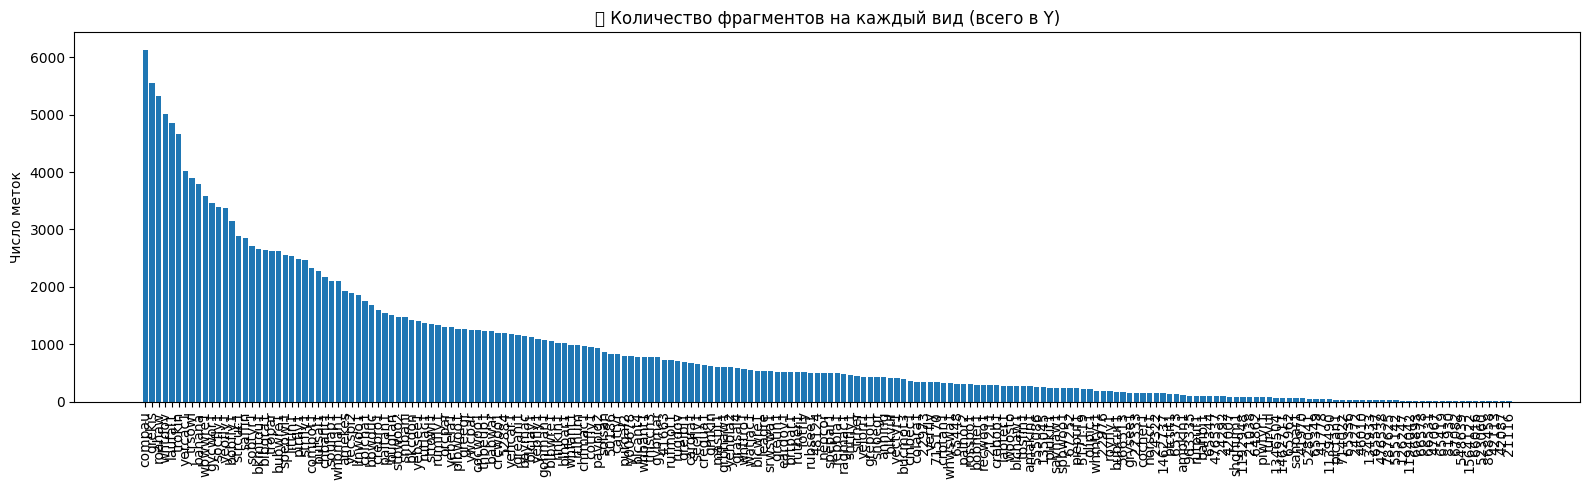

In [14]:
class_sums = Y.sum(axis=0)

# Таблица
class_summary_df = pd.DataFrame({
    'class': all_species,
    'n_samples': class_sums
}).sort_values(by='n_samples', ascending=False)

print("📋 Сводка по классам:")
print(class_summary_df.head(10))

# Визуализация (все классы, если не слишком много)
plt.figure(figsize=(16, 5))
plt.bar(class_summary_df['class'], class_summary_df['n_samples'])
plt.xticks(rotation=90)
plt.title('🔢 Количество фрагментов на каждый вид (всего в Y)')
plt.ylabel('Число меток')
plt.tight_layout()
plt.show()


In [19]:
# 1. Найдём индексы классов, у которых < 5 активных фрагментов
rare_class_indices = np.where(Y.sum(axis=0) < 5)[0]
print(f"❗ Классов с < 5 фрагментами: {len(rare_class_indices)}")

# 2. Для каждого редкого класса найдём фрагменты, где он встречается
for class_idx in rare_class_indices:
    class_name = all_species[class_idx]
    fragment_indices = np.where(Y[:, class_idx] == 1)[0]
    
    print(f"\n🔍 Вид {class_name} встречается в {len(fragment_indices)} фрагментах:")
    
    for i in fragment_indices:
        active_classes = [all_species[j] for j in np.where(Y[i] == 1)[0]]
        print(f"  - Файл: {id_df.iloc[i]['filename']} | Срез: {id_df.iloc[i]['slice_idx']} | Метки: {active_classes}")


❗ Классов с < 5 фрагментами: 6

🔍 Вид 21116 встречается в 2 фрагментах:
  - Файл: iNat296867.ogg | Срез: 0 | Метки: ['21116']
  - Файл: iNat65520.ogg | Срез: 0 | Метки: ['21116']

🔍 Вид 42087 встречается в 3 фрагментах:
  - Файл: iNat155127.ogg | Срез: 0 | Метки: ['42087']
  - Файл: iNat155127.ogg | Срез: 1 | Метки: ['42087']
  - Файл: iNat860016.ogg | Срез: 0 | Метки: ['42087']

🔍 Вид 42113 встречается в 4 фрагментах:
  - Файл: iNat55456.ogg | Срез: 0 | Метки: ['42113']
  - Файл: iNat557906.ogg | Срез: 0 | Метки: ['42113']
  - Файл: iNat557906.ogg | Срез: 1 | Метки: ['42113']
  - Файл: iNat557906.ogg | Срез: 2 | Метки: ['42113']

🔍 Вид 523060 встречается в 4 фрагментах:
  - Файл: CSA34180.ogg | Срез: 0 | Метки: ['523060']
  - Файл: CSA34181.ogg | Срез: 0 | Метки: ['523060']
  - Файл: CSA34182.ogg | Срез: 0 | Метки: ['523060']
  - Файл: CSA34183.ogg | Срез: 0 | Метки: ['523060']

🔍 Вид 66016 встречается в 4 фрагментах:
  - Файл: iNat14973.ogg | Срез: 0 | Метки: ['66016']
  - Файл: iNat

In [20]:
import joblib

joblib.dump(multi_model, 'multioutput_model.pkl')

['multioutput_model.pkl']